# Load data

In [16]:
%matplotlib inline

In [17]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
TEST_PATH = "../data/test_results5/stats.csv"

In [27]:
def load_ndata(filename):
    dcu = pd.read_csv(filename)
    data = {
        'model': dcu['model'].to_numpy(),
        'model_triangles': dcu[' model_triangles'].to_numpy(),
        'total_ms': dcu[' total_ms'].to_numpy() / 1000, #to seconds (?)
    }
    
    #(marzia) Questo penso che non sia necessario
    #data['seconds'] = np.clip(data['seconds'], 0.000001, 10000.0)
    #cond = data['seconds'] < 0.001
    #data['hue'] = np.select([cond], [1], default=0)
    return data

In [34]:
data = load_ndata(TEST_PATH)
print(len(data['model']))

204


# Meshes

In [21]:
min(data['model_triangles'])

102484

In [22]:
max(data['model_triangles'])

3154110

# Timings

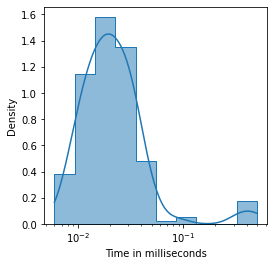

In [32]:
plt.figure(figsize=(4,4));
ax = plt.gca();
# ax.set_xlim(left=0.000001,right=2.5);
# ax.set_ylim(bottom=0,top=0.75);
sns.histplot(x=data['total_ms'], log_scale=True, bins=10, kde=True, element='step', stat='density', ax=ax);
plt.xlabel('Time in milliseconds');
plt.ylabel('Density');
#plt.title("");
plt.savefig("timings.pdf");

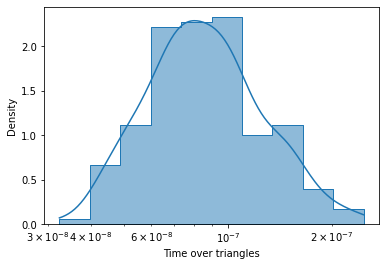

In [36]:
plt.figure();
plt.xlabel('Time over triangles');
plt.ylabel('Density');
sns.histplot(x=data['total_ms']/data['model_triangles'], log_scale=True, bins=10, kde=True, element='step', stat='density');

In [31]:
print('percent below 0.001')
print(np.count_nonzero(data['total_ms'] < 0.001) / len(data['total_ms']))
    
print('percent below 0.1')
print(np.count_nonzero(data['total_ms'] < 0.1) / len(data['total_ms']))

print('percenline 90%')
print(np.percentile(data['total_ms'], 90))

print('percenline 99%')
print(np.percentile(data['total_ms'], 99))

percent below 0.001
0.0
percent below 0.1
0.9656862745098039
percenline 90%
0.038736656800000005
percenline 99%
0.4818211852399999
